In [1]:
dofile 'provider.lua'

In [2]:
provider = torch.load('provider.t7')

In [3]:
provider

Provider
{
  trainData : 
    {
      data : FloatTensor - size: 4000x3x96x96
      std_u : 13.766151323321
      mean_u : -3.9272570412993
      labels : FloatTensor - size: 4000
      size : function: 0x419f8700
      mean_v : 1.8419336072631
      std_v : 16.746470205287
    }
  valData : 
    {
      data : FloatTensor - size: 1000x3x96x96
      size : function: 0x400a8d38
      labels : FloatTensor - size: 1000
    }
}


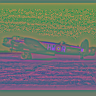

In [4]:
itorch.image(provider.trainData.data[1])

In [5]:
provider.trainData.data = provider.trainData.data:float()
provider.valData.data = provider.valData.data:float()

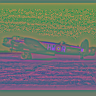

In [6]:
itorch.image(provider.trainData.data[1])

In [7]:
function parseDataLabel(d, numSamples, numChannels, height, width)
    local t = torch.ByteTensor(numSamples, numChannels, height, width)
    local l = torch.ByteTensor(numSamples)
    local idx = 1
    for i = 1, #d do
        local this_d = d[i]
        for j = 1, #this_d do
            t[idx]:copy(this_d[j])
            l[idx] = i
            idx = idx + 1
        end
    end
    assert(idx == numSamples+1)
    return t, l
end

In [8]:
trsize = 4000
valsize = 1000  -- Use the validation here as the valing set
channel = 3
height = 96
width = 96

In [22]:
raw_train = torch.load('stl-10/train.t7b')
raw_val = torch.load('stl-10/val.t7b')

In [23]:
trainData = {
     data = torch.Tensor(),
     labels = torch.Tensor(),
     size = function() return trsize end
  }
trainData.data, trainData.labels = parseDataLabel(raw_train.data, trsize, channel, height, width)

In [24]:
valData = {
    data = torch.Tensor(),
    labels = torch.Tensor(),
    size = function() return valsize end
}
valData.data, valData.labels = parseDataLabel(raw_val.data,valsize, channel, height, width)

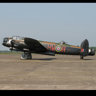

In [31]:
itorch.image(trainData.data[1])

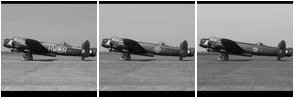

In [56]:
itorch.image({trainData.data[1][1], trainData.data[1][2], trainData.data[1][3]})

In [35]:
trainData.data = trainData.data:float()
trainData.labels = trainData.labels:float()
valData.data = valData.data:float()
valData.labels = valData.labels:float()

In [36]:
collectgarbage()

0	


In [37]:
normalization = nn.SpatialContrastiveNormalization(1, image.gaussian1D(7))

In [46]:
rgb = trainData.data[1]

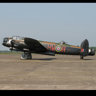

In [47]:
itorch.image(rgb)

In [48]:
yuv = image.rgb2yuv(rgb)

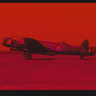

In [49]:
itorch.image(yuv)

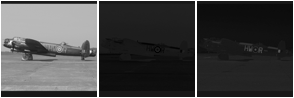

In [55]:
itorch.image({yuv[1], yuv[2], yuv[3]})

In [57]:
yuv[1] = normalization(yuv[{{1}}])

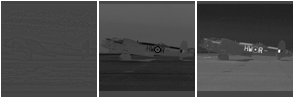

In [58]:
itorch.image({yuv[1], yuv[2], yuv[3]})